# Plant_Leaf Disease Classification Using CNN

This project aims to detect plant leaf diseases using artificial intelligence, specifically a Convolutional Neural Network (CNN). The tool is designed to help farmers quickly and accurately identify diseases in leaves, saving time and improving crop health.

## Objectives:
1. Classify leaves as **Healthy**, **Powdery Mildew**, or **Rust**.
2. Achieve high accuracy with minimal errors.
3. Lay the foundation for real-world applications such as mobile apps.


In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import confusion_matrix, classification_report





## Dataset Overview

- **Categories**: Healthy, Powdery Mildew, and Rust.
- **Image Distribution**: Data is split into:
  - **Training Set**: Images used for learning.
  - **Validation Set**: Used to tune the model and avoid overfitting.
  - **Test Set**: Evaluates the final performance of the model.

In [29]:
def total_files(folder_path):
    return len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])


# Paths
base_path = "C:/Users/AJ/ML project/dataset"
train_path = os.path.join(base_path, "Train/Train")
test_path = os.path.join(base_path, "Test/Test")
validation_path = os.path.join(base_path, "Validation/Validation")

# Count files
categories = ["Healthy", "Powdery", "Rust"]
for category in categories:
    print(f'Number of {category.lower()} leaf images in training set:', total_files(os.path.join(train_path, category)))
    print(f'Number of {category.lower()} leaf images in test set:', total_files(os.path.join(test_path, category)))
    print(f'Number of {category.lower()} leaf images in validation set:', total_files(os.path.join(validation_path, category)))
    print("==============================================================================================================")


Number of healthy leaf images in training set: 430
Number of healthy leaf images in test set: 53
Number of healthy leaf images in validation set: 20
Number of powdery leaf images in training set: 430
Number of powdery leaf images in test set: 53
Number of powdery leaf images in validation set: 20
Number of rust leaf images in training set: 430
Number of rust leaf images in test set: 55
Number of rust leaf images in validation set: 20


## Data Preprocessing
- Augmentation techniques (e.g., flipping, rotating, zooming) were applied to make the model robust to variations.
- Image normalization ensures the pixel values are scaled consistently.


In [24]:
# Data augmentation for training, normalization for validation/test
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True)

# Only normalization for validation and test sets
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


# Create generators
train_generator = train_datagen.flow_from_directory(
    train_path, 
    target_size=(225, 225),
    batch_size=32, 
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_path, 
    target_size=(225, 225), 
    batch_size=32, 
    class_mode='categorical'
)

# Create a test generator for evaluating the model
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical'
)






Found 1290 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Found 161 images belonging to 3 classes.


## Model Architecture

The CNN is structured as follows:
1. **Input Layer**: Accepts image data.
2. **Convolutional Layers**: Detect patterns like spots and edges.
3. **Pooling Layers**: Reduce dimensionality and computation.
4. **Fully Connected Layer**: Maps features to the classes (Healthy, Powdery Mildew, Rust).
5. **Output Layer**: Softmax activation for classification.

In [23]:
# Define the model architecture (Simple CNN)
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



C:\Users\AJ\python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Training the Model

The model was trained using the training set, validated during training,and evaluated on the test set to ensure robust performance.


In [9]:
# Define the path where the model will be saved
save_path = 'models/best_model.keras'

# Check if the directory exists; if not, create it
if not os.path.exists(os.path.dirname(save_path)):
    os.makedirs(os.path.dirname(save_path))


In [10]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
model_checkpoint = ModelCheckpoint(save_path, save_best_only=True, monitor='val_loss')


In [14]:
# Train the model with combined callbacks
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, lr_scheduler, model_checkpoint]
)


Epoch 1/50


C:\Users\AJ\python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.4109 - loss: 14.4132 - val_accuracy: 0.4833 - val_loss: 0.9439 - learning_rate: 0.0010
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 118s 2s/step - accuracy: 0.7688 - loss: 0.6037 - val_accuracy: 0.8333 - val_loss: 0.5757 - learning_rate: 0.0010
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.8109 - loss: 0.4816 - val_accuracy: 0.7333 - val_loss: 0.6354 - learning_rate: 0.0010
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.8446 - loss: 0.4000 - val_accuracy: 0.8167 - val_loss: 0.4977 - learning_rate: 0.0010
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.8796 - loss: 0.3313 - val_accuracy: 0.8000 - val_loss: 0.5244 - learning_rate: 0.0010
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.9010 - loss: 0.2885 - val_accuracy: 0.8500 - val_loss: 0.4719 - learning_rate: 0.0010
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.9044 - loss: 0.2625 - val_accuracy: 0.7

# Leaf Disease Classification Using CNN

This notebook classifies plant leaf diseases using a Convolutional Neural Network (CNN). The model identifies **Healthy**, **Powdery**, and **Rust** diseases in leaves based on images.

## Saving and Loading the Model and Training History

### Why Save the Training History?
Saving the **training history** helps to:
1. **Resume Training**: If you need to continue training later, you can load the history and model weights to avoid retraining from scratch.
2. **Track Metrics**: The history allows you to analyze the model's performance (accuracy, loss) over epochs and visualize progress.

### Code for Saving History:
```python
 # Save the training history for future use (in case we want to resume or analyze)



In [26]:

# Save the final model
model.save('Aiproject_Model.keras')


In [34]:
# Save training history
with open('train_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


In [11]:
# Load the saved model
model = load_model('Aiproject_Model.keras')

In [12]:
# # Load the training history
# with open('train_history.pkl', 'rb') as file:
#     loaded_history = pickle.load(file)

# # Access training metrics
# print(loaded_history.keys())  # Outputs: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', ...])


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


In [13]:
  # Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

C:\Users\AJ\python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8659 - loss: 0.4332
Test Loss: 0.4213, Test Accuracy: 0.8696


In [14]:
# Evaluation on validation set
predicted_labels = np.argmax(model.predict(validation_generator), axis=1)
true_labels = validation_generator.classes

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step


## Evaluation Results

- On the test set, the model correctly identified **86.96%** of the images.
- The confusion matrix shows how well it classified different diseases.

### Strength:
- Good accuracy overall (86.96%).

In [15]:
# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Classification report
class_labels = list(validation_generator.class_indices.keys())
cr = classification_report(true_labels, predicted_labels, target_names=class_labels)
print("Classification Report:")
print(cr)


Confusion Matrix:
[[ 4  7  9]
 [ 5  9  6]
 [11  5  4]]
Classification Report:
              precision    recall  f1-score   support

     Healthy       0.20      0.20      0.20        20
     Powdery       0.43      0.45      0.44        20
        Rust       0.21      0.20      0.21        20

    accuracy                           0.28        60
   macro avg       0.28      0.28      0.28        60
weighted avg       0.28      0.28      0.28        60



In [19]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

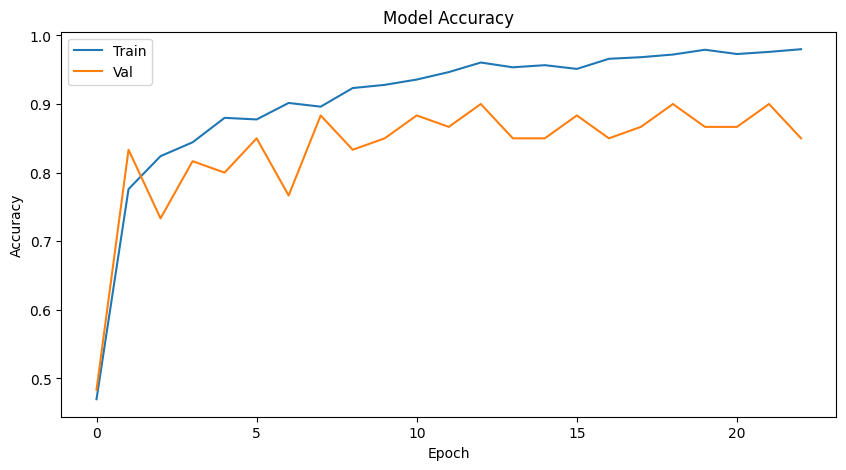

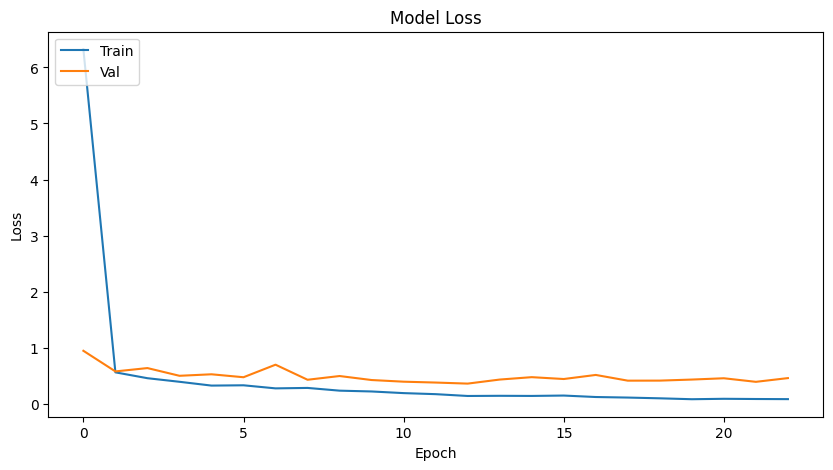

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


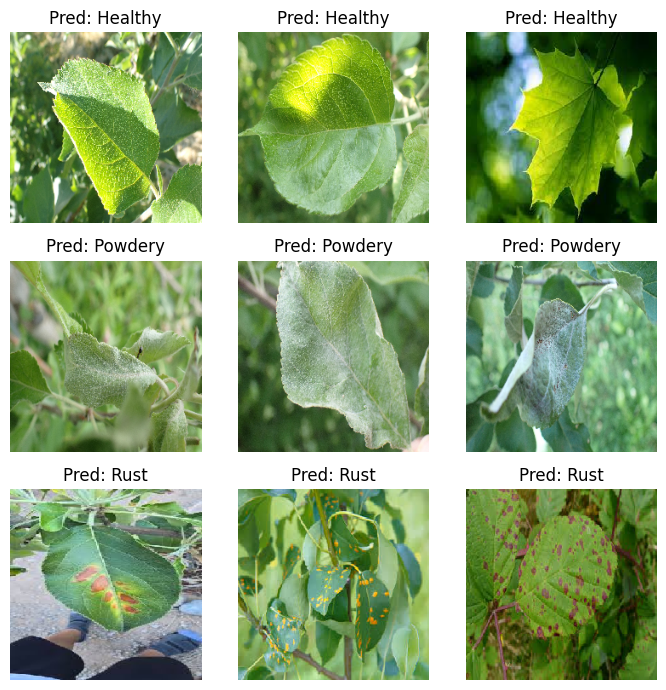

In [18]:


# Function to preprocess an image for prediction
def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.0
    x = np.expand_dims(x, axis=0)
    return x

# Define image paths
image_paths = [
 
#Healthy 
     "C:/Users/AJ/ML project/dataset/Test/Test/Healthy/8fc3b16e36d0aac8.jpg",
    "C:/Users/AJ/ML project/dataset/Test/Test/Healthy/8def4d91382175c3.jpg",
    "C:/Users/AJ/ML project/dataset/Test/Test/Healthy/2.jpeg",
    
#Powdery
    "C:/Users/AJ/ML project/dataset/Test/Test/Powdery/81fd7a861aedb380.jpg",
    "C:/Users/AJ/ML project/dataset/Test/Test/Powdery/83c12a8da497ef33.jpg",
    "C:/Users/AJ/ML project/dataset/Test/Test/Powdery/84d40fd9cf1819cf.jpg",
     
    #Rust
    "C:/Users/AJ/ML project/dataset/Test/Test/Rust/4.jpeg",
    "C:/Users/AJ/ML project/dataset/Test/Test/Rust/3.jpeg",
    "C:/Users/AJ/ML project/dataset/Test/Test/Rust/2.jpeg",
    
]
# Get labels from train generator
labels = {v: k for k, v in train_generator.class_indices.items()}

# Set up 6x6 grid for images
rows = 3
columns = 3

# Initialize the figure size (adjust as needed)
plt.figure(figsize=(7, 7))

# Loop through images and predictions
for i, image_path in enumerate(image_paths):
    x = preprocess_image(image_path)
    predictions = model.predict(x)
    predicted_class = np.argmax(predictions[0])
    predicted_label = labels[predicted_class]

    img = load_img(image_path, target_size=(225, 225))

    # Add subplot in grid
    plt.subplot(rows, columns, i + 1)
    plt.imshow(img)
    plt.title(f"Pred: {predicted_label}", fontsize=12)  # Make labels clearer
    plt.axis('off')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


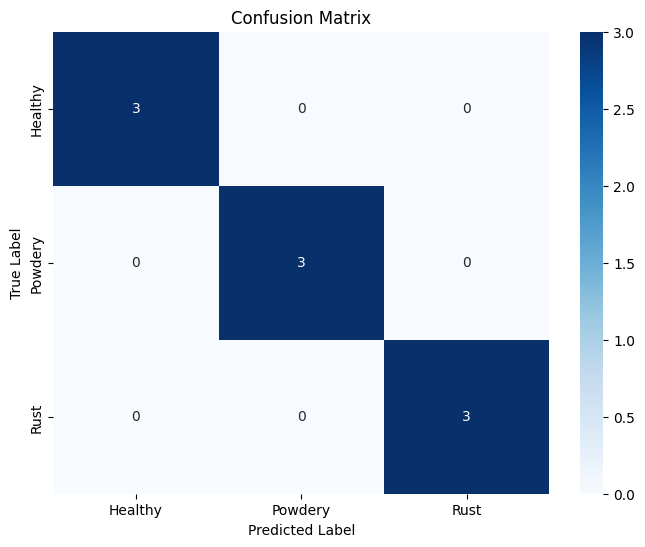

              precision    recall  f1-score   support

     Healthy       1.00      1.00      1.00         3
     Powdery       1.00      1.00      1.00         3
        Rust       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [20]:
# Confusion matrix and classification report for specific images
actual_labels = []
predicted_labels = []

for image_path in image_paths:
    x = preprocess_image(image_path)
    predictions = model.predict(x)
    predicted_class = np.argmax(predictions[0])
    folder_name = image_path.split("/")[-2]
    actual_class = list(labels.values()).index(folder_name)

    actual_labels.append(actual_class)
    predicted_labels.append(predicted_class)

# Confusion matrix for specific images
cm = confusion_matrix(actual_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels.values(), yticklabels=labels.values())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report for the specific predictions
print(classification_report(actual_labels, predicted_labels, target_names=labels.values()))
